## 特征抽取
**特征提升**  
特征抽取：特征向量化；特征筛选：特征组合

### DictVectorizer对使用字典存储的数据进行特征抽取与向量化

In [1]:
measurements=[{'city':'Dubai','temperature':33.},{'city':'London','temperature':12.},{'city':'san Fransisco','temperature':18.}]

In [4]:
from sklearn.feature_extraction import DictVectorizer

In [12]:
vec=DictVectorizer()
print(vec.fit_transform(measurements).toarray())
#输出转化之后的特征向量

[[ 1.  0.  0. 33.]
 [ 0.  1.  0. 12.]
 [ 0.  0.  1. 18.]]


In [15]:
print(vec.get_feature_names())
#输出特征的名字

['city=Dubai', 'city=London', 'city=san Fransisco', 'temperature']


DictVectorizer对于数值型特征维持原始数值，而对于类型特征利用独热编码，产生新的组合特征

### CountVectorizer和TfidfVectorizer

对于有些文本数据，只是一系列的字符串，处理这些数据，通常使用的文本特征表示方法为词袋法。  
不考虑词语出现的位置，把每一个出现的词视为特征，将不重复的词集合为词表，这样每一条训练文本都可以在高维的词表上映射出一个特征向量。

**特征数值的常见计算方法有：CountVectorizer和TfidfVectorizer**

对于每一条训练文本，CountVectorizer只考虑每种词汇在该条训练文本中出现的频数  
对于TfidfVectorizer，不仅考虑频数，而且考虑包括这个词汇的文本条数的倒数，这样就可以压制常用词对分类决策的干扰  
词频的数目越多，TfidfVectorizer的优势越大

我们考虑词频的目的是找到有贡献的重要词汇，如果一个词在每篇文本中都有，就说明是常用词汇，这些词称为**停用词**

---

**现在对于不去掉停用词和去掉停用词，分别使用CountVectorizer和TfidfVectorizer进行特征抽取，利用朴素贝叶斯进行分类**

### 导入数据

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
news=fetch_20newsgroups(subset='all')
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(news.data,news.target,test_size=0.25,random_state=33)

In [5]:
len(X_train)

array([ 6,  1,  5, ..., 17, 13,  3])

使用CountVectorizer，不去除停用词

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec1=CountVectorizer()#默认不去除英文停用词
X_count_train1=count_vec1.fit_transform(X_train)
X_count_test1=count_vec1.transform(X_test)

使用CountVectorizer，去除停用词

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec2=CountVectorizer(analyzer='word',stop_words='english')#去除英文停用词
X_count_train2=count_vec2.fit_transform(X_train)
X_count_test2=count_vec2.transform(X_test)

使用TfidfVectorizer，不去除停用词

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec1=TfidfVectorizer()#不去除英文停用词
X_tfidf_train1=tfidf_vec1.fit_transform(X_train)
X_tfidf_test1=tfidf_vec1.transform(X_test)

使用TfidVectorizer，去除停用词

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec2=TfidfVectorizer(analyzer='word',stop_words='english')#去除英文停用词
X_tfidf_train2=tfidf_vec2.fit_transform(X_train)
X_tfidf_test2=tfidf_vec2.transform(X_test)

### 训练数据

In [22]:
from sklearn.naive_bayes import MultinomialNB

In [23]:
#使用CountVectorizer，不去除停用词
mnb_count1=MultinomialNB()
mnb_count1.fit(X_count_train1,y_train)
mnb_count1_predict=mnb_count1.predict(X_count_test1)

In [24]:
#使用CountVectorizer，去除停用词
mnb_count2=MultinomialNB()
mnb_count2.fit(X_count_train2,y_train)
mnb_count2_predict=mnb_count2.predict(X_count_test2)

In [25]:
#使用TfidfVectorizer，不去除停用词
mnb_tfidf1=MultinomialNB()
mnb_tfidf1.fit(X_tfidf_train1,y_train)
mnb_tfidf1_predict=mnb_tfidf1.predict(X_tfidf_test1)

In [26]:
#使用TfidfVectorizer，去除停用词
mnb_tfidf2=MultinomialNB()
mnb_tfidf2.fit(X_tfidf_train2,y_train)
mnb_tfidf2_predict=mnb_tfidf2.predict(X_tfidf_test2)

### 指标分析

In [27]:
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [28]:
print('使用CountVectorizer，不去除停用词')
print('accuracy',mnb_count1.score(X_count_test1,y_test))
#print(classification_report(y_test,mnb_count1_predict,target_names=news.target_names))

使用CountVectorizer，不去除停用词
accuracy 0.8397707979626485


In [29]:
print('使用CountVectorizer，去除停用词')
print('accuracy',mnb_count2.score(X_count_test2,y_test))
#print(classification_report(y_test,mnb_count2_predict,target_names=news.target_names))

使用CountVectorizer，去除停用词
accuracy 0.8637521222410866


In [30]:
print('使用TfidfVectorizer，不去除停用词')
print('accuracy',mnb_tfidf1.score(X_tfidf_test1,y_test))
#print(classification_report(y_test,mnb_tfidf1_predict,target_names=news.target_names))

使用TfidfVectorizer，不去除停用词
accuracy 0.8463497453310697


In [31]:
print('使用TfidfVectorizer，去除停用词')
print('accuracy',mnb_tfidf2.score(X_tfidf_test2,y_test))
#print(classification_report(y_test,mnb_tfidf2_predict,target_names=news.target_names))

使用TfidfVectorizer，去除停用词
accuracy 0.8826400679117148


根据上述结果，去除停用词后，准确率较高

## 特征筛选

特征筛选与PCA有所区别，尽管二者都是降低维度，但是PCA是生成新的特征，有时无法解释，而特征筛选是删除无用或者作用较小的特征

这里使用泰坦尼克数据集进行分析

### 导入数据+数据处理

In [33]:
import pandas as pd
titanic=pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt')

In [36]:
#这里进行特征选择
#X=titanic[['pclass','age','sex']]
X=titanic.drop(['row.names','name','survived'],axis=1)
y=titanic['survived']

In [50]:
X.info()#缺失值严重

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 8 columns):
pclass       1313 non-null object
age          1313 non-null float64
embarked     1313 non-null object
home.dest    1313 non-null object
room         1313 non-null object
ticket       1313 non-null object
boat         1313 non-null object
sex          1313 non-null object
dtypes: float64(1), object(7)
memory usage: 82.1+ KB


In [51]:
X['age'].fillna(X['age'].mean(),inplace=True)
X.fillna('UNKNOWN',inplace=True)#缺失值用unknown填充

In [168]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=33)

In [169]:
from sklearn.feature_extraction import DictVectorizer
vec=DictVectorizer(sparse=False)#sparse=False意思是不产生稀疏矩阵
X_train=vec.fit_transform(X_train.to_dict(orient='record'))
X_test=vec.transform(X_test.to_dict(orient='record'))
len(vec.feature_names_)

474

1. 字符串表示离散无序变量取值时，独热编码使用DictVectorizer，若使用LabelEncoder + OneHotEncoder，麻烦；
2. 整数表示离散无序变量取值时，独热编码使用OneHotEncoder；

### 训练数据

In [112]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train,y_train)
dtc_predict=dtc.predict(X_test)
dtc.score(X_test,y_test)

0.8662613981762918

从sklearn中导入特征筛选器

In [170]:
from sklearn.feature_selection import SelectPercentile,chi2

In [171]:
#筛选前20%的特征
fs=SelectPercentile(chi2,percentile=20)

In [172]:
X_train_fs=fs.fit_transform(X_train,y_train)
X_test_fs=fs.transform(X_test)

使用相同配置的决策树进行预测

In [173]:
dtc_fs=DecisionTreeClassifier(criterion='entropy')
dtc_fs.fit(X_train_fs,y_train)
dtc_fs_predict=dtc_fs.predict(X_test_fs)
dtc_fs.score(X_test_fs,y_test)

0.817629179331307

通过交叉验证，按照固定间隔的百分比筛选特征，并作图展示性能随特征筛选比例的变化

In [174]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [175]:
percentiles=range(1,100,2)
results=[]

In [176]:
for i in percentiles:
    fs=SelectPercentile(chi2,percentile=i)
    X_train_fs=fs.fit_transform(X_train,y_train)
    X_test_fs=fs.transform(X_test)
    scores=cross_val_score(dtc_fs,X_train_fs,y_train,cv=5)
    results=np.append(results,scores.mean())

In [177]:
print(results)

[0.85063904 0.85673057 0.87501546 0.88622964 0.86995465 0.86898578
 0.86793445 0.87101629 0.87198516 0.86894455 0.86488353 0.86696557
 0.86895485 0.86489384 0.86487322 0.86389404 0.86994434 0.86285302
 0.8638322  0.86791383 0.86385281 0.86486291 0.86590394 0.86895485
 0.86489384 0.86488353 0.87303649 0.86793445 0.86897547 0.86486291
 0.87198516 0.86692435 0.87097506 0.86996496 0.86691404 0.86893424
 0.86892393 0.87404659 0.86894455 0.87301587 0.87299526 0.86385281
 0.8608019  0.86896516 0.8608122  0.86794475 0.86184292 0.86185323
 0.8598021  0.86285302]


找到性能最佳的特征筛选百分比

In [178]:
opt=np.where(results==results.max())[0]
#在results中所在的位置

In [179]:
print(percentiles[int(opt)])

7


画图

In [189]:
#import pylab as pl
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

Text(0, 0.5, '准确率')

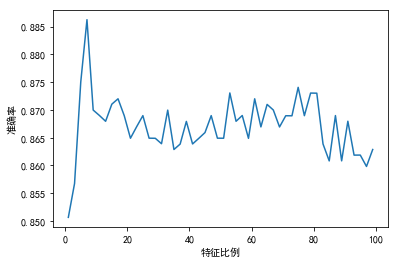

In [190]:
plt.plot(percentiles,results)
plt.xlabel('特征比例')
plt.ylabel('准确率')

采用最佳比例进行预测

In [191]:
fs=SelectPercentile(chi2,percentile=7)
X_train_fs=fs.fit_transform(X_train,y_train)
X_test_fs=fs.transform(X_test)
dtc_fs.fit(X_train_fs,y_train)
dtc_fs.score(X_test_fs,y_test)

0.8571428571428571

## 模型的正则化

### 欠拟合和过拟合

#### 导入数据

**删除变量**
`reset`

In [270]:
X_train=[[6],[8],[10],[14],[18]]
y_train=[[7],[9],[13],[17.5],[18]]
X_test=[[6],[8],[11],[16]]
y_test=[[8],[12],[15],[18]]

In [271]:
from sklearn.linear_model import LinearRegression

#### 一次多项式

In [272]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [273]:
import numpy as np
xx=np.linspace(0,26,100)
xx=xx.reshape(xx.shape[0],1)

In [274]:
yy=regressor.predict(xx)

画图

In [275]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

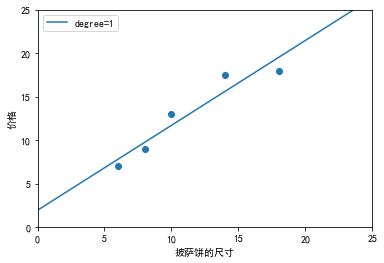

In [276]:
plt.scatter(X_train,y_train)
plt1,=plt.plot(xx,yy,label='degree=1')
plt.axis([0,25,0,25])
plt.xlabel('披萨饼的尺寸')
plt.ylabel('价格')
plt.legend(handles=[plt1])
plt.show()

In [277]:
regressor.score(X_train,y_train)

0.9100015964240102

#### 二次多项式

导入多项式特征产生器

In [278]:
from sklearn.preprocessing import PolynomialFeatures

In [296]:
poly2=PolynomialFeatures(degree=2)
X_train_poly2=poly2.fit_transform(X_train)

In [297]:
X_train_poly2

array([[  1.,   6.,  36.],
       [  1.,   8.,  64.],
       [  1.,  10., 100.],
       [  1.,  14., 196.],
       [  1.,  18., 324.]])

In [298]:
regressor_poly2=LinearRegression()
regressor_poly2.fit(X_train_poly2,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [299]:
xx_ploy2=poly2.transform(xx)
yy_poly2=regressor_poly2.predict(xx_ploy2)

画图

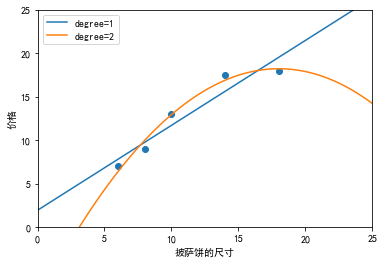

In [300]:
plt.scatter(X_train,y_train)
plt1,=plt.plot(xx,yy,label='degree=1')
plt2,=plt.plot(xx,yy_poly2,label='degree=2')
plt.axis([0,25,0,25])
plt.xlabel('披萨饼的尺寸')
plt.ylabel('价格')
plt.legend(handles=[plt1,plt2])
plt.show()

In [301]:
regressor_poly2.score(X_train_poly2,y_train)

0.9816421639597427

#### 四次多项式

In [302]:
poly4=PolynomialFeatures(degree=4)
X_train_poly4=poly4.fit_transform(X_train)

In [303]:
X_train_poly4

array([[1.00000e+00, 6.00000e+00, 3.60000e+01, 2.16000e+02, 1.29600e+03],
       [1.00000e+00, 8.00000e+00, 6.40000e+01, 5.12000e+02, 4.09600e+03],
       [1.00000e+00, 1.00000e+01, 1.00000e+02, 1.00000e+03, 1.00000e+04],
       [1.00000e+00, 1.40000e+01, 1.96000e+02, 2.74400e+03, 3.84160e+04],
       [1.00000e+00, 1.80000e+01, 3.24000e+02, 5.83200e+03, 1.04976e+05]])

In [304]:
regressor_poly4=LinearRegression()
regressor_poly4.fit(X_train_poly4,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [305]:
xx_ploy4=poly4.transform(xx)
yy_poly4=regressor_poly4.predict(xx_ploy4)

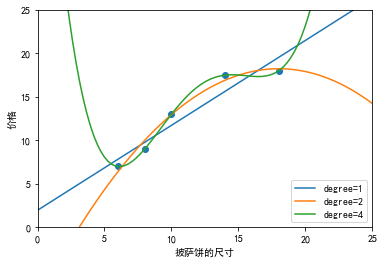

In [307]:
plt.scatter(X_train,y_train)
plt1,=plt.plot(xx,yy,label='degree=1')
plt2,=plt.plot(xx,yy_poly2,label='degree=2')
plt4,=plt.plot(xx,yy_poly4,label='degree=4')
plt.axis([0,25,0,25])
plt.xlabel('披萨饼的尺寸')
plt.ylabel('价格')
plt.legend(handles=[plt1,plt2,plt4])
plt.show()

In [308]:
regressor_poly4.score(X_train_poly4,y_train)

1.0

一次欠拟合，二次正好，四次过拟合

#### 比较性能

In [310]:
X_test_poly2=poly2.transform(X_test)
X_test_poly4=poly4.transform(X_test)

In [318]:
print('拟合优度R_2:')
print('一次:',end='')
print(regressor.score(X_test,y_test))
print('二次:',end='')
print(regressor_poly2.score(X_test_poly2,y_test))
print('四次:',end='')
print(regressor_poly4.score(X_test_poly4,y_test))

拟合优度R_2:
一次:0.809726797707665
二次:0.8675443656345054
四次:0.8095880795781909


### L1范数正则化

正则化的目的是为了提高模型在未知测试数据上的泛化能力，避免参数的过拟合

正则化常见的方法是在原始模型优化目标的基础上，增加对于参数的惩罚项

L1正则化，又称为lasso，能够使有效特征变得稀疏，会让参数向量中很多元素趋向于0，留下更有用的特征

In [323]:
from sklearn.linear_model import Lasso

In [324]:
lasso_poly4=Lasso()
lasso_poly4.fit(X_train_poly4,y_train)
lasso_poly4.score(X_train_poly4,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.9940832798380284

In [327]:
#对于测试样本的性能检测
lasso_poly4.score(X_test_poly4,y_test)

0.8388926873604381

In [333]:
#没有正则化的时候，可以看到正则化确实提高了一些性能
regressor_poly4.score(X_test_poly4,y_test)

0.8095880795781909

In [334]:
lasso_poly4.coef_

array([ 0.00000000e+00,  0.00000000e+00,  1.17900534e-01,  5.42646770e-05,
       -2.23027128e-04])

In [335]:
lasso_poly4.intercept_

array([2.89312233])

### L2范数正则化

In [336]:
from sklearn.linear_model import Ridge

In [339]:
ridge_poly4=Ridge()
ridge_poly4.fit(X_train_poly4,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [340]:
#对于测试样本的性能检测
ridge_poly4.score(X_test_poly4,y_test)

0.8374201759366504

In [341]:
ridge_poly4.coef_

array([[ 0.        , -0.00492536,  0.12439632, -0.00046471, -0.00021205]])

In [342]:
ridge_poly4.intercept_

array([2.7338703])

### 超参数的搜索

#### 网格搜索

依靠网格搜索对于多种超参数的组合的空间进行暴力搜索  
每个模型都会利用交叉验证的办法进行评估结果

使用单线程对文本分类的支持向量机模型的超参数组合执行网格搜索

In [383]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np

In [384]:
news=fetch_20newsgroups(subset='all')

In [402]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(news.data[:3000],news.target[:3000],test_size=0.25,random_state=2019)

In [403]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

导入pipeline，将文本抽取和分类器串联起来  
使用Pipeline简化系统搭建流程，sklean提供的pipeline来将多个学习器组成流水线，通常流水线的形式为：   
**将数据标准化的学习器---特征提取的学习器---执行预测的学习器**

In [404]:
from sklearn.pipeline import Pipeline

In [414]:
clf=Pipeline([('vect',TfidfVectorizer(stop_words='english',analyzer='word')),('svc',SVC())])

参数组合  
parameters变量里面的key都有一个前缀,这个前缀其实就是在Pipeline中定义的操作名。二者相结合，使我们的代码变得十分简洁。  
这里对参数名是<两条>下划线 __

In [420]:
parameters={'svc__gamma':np.logspace(-2,1,4),'svc__C':np.logspace(-1,1,3)}

In [421]:
parameters

{'svc__gamma': array([ 0.01,  0.1 ,  1.  , 10.  ]),
 'svc__C': array([ 0.1,  1. , 10. ])}

网格搜索GridSearch

In [422]:
from sklearn.model_selection import GridSearchCV

In [423]:
gs=GridSearchCV(clf,parameters,verbose=2,refit=True,cv=3)#注意refit=True

执行单线程网格搜索

In [424]:
gs.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] svc__C=0.1, svc__gamma=0.01 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... svc__C=0.1, svc__gamma=0.01, total=   8.9s
[CV] svc__C=0.1, svc__gamma=0.01 .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.4s remaining:    0.0s


[CV] ...................... svc__C=0.1, svc__gamma=0.01, total=   9.0s
[CV] svc__C=0.1, svc__gamma=0.01 .....................................
[CV] ...................... svc__C=0.1, svc__gamma=0.01, total=   8.3s
[CV] svc__C=0.1, svc__gamma=0.1 ......................................
[CV] ....................... svc__C=0.1, svc__gamma=0.1, total=   7.3s
[CV] svc__C=0.1, svc__gamma=0.1 ......................................
[CV] ....................... svc__C=0.1, svc__gamma=0.1, total=   9.7s
[CV] svc__C=0.1, svc__gamma=0.1 ......................................
[CV] ....................... svc__C=0.1, svc__gamma=0.1, total=   7.9s
[CV] svc__C=0.1, svc__gamma=1.0 ......................................
[CV] ....................... svc__C=0.1, svc__gamma=1.0, total=   8.4s
[CV] svc__C=0.1, svc__gamma=1.0 ......................................
[CV] ....................... svc__C=0.1, svc__gamma=1.0, total=   8.0s
[CV] svc__C=0.1, svc__gamma=1.0 ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  7.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'svc__gamma': array([ 0.01,  0.1 ,  1.  , 10.  ]), 'svc__C': array([ 0.1,  1. , 10. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [433]:
print(gs.best_params_)
print(gs.best_score_)

{'svc__C': 10.0, 'svc__gamma': 0.1}
0.7902222222222223


In [434]:
print(gs.score(X_test,y_test))

0.8053333333333333


执行多线程网格搜索，其中n_jobs=-1表示使用全部的CPU

In [439]:
gs=GridSearchCV(clf,parameters,verbose=2,refit=True,cv=3,n_jobs=-1)#注意refit=True

In [440]:
gs.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  2.2min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'svc__gamma': array([ 0.01,  0.1 ,  1.  , 10.  ]), 'svc__C': array([ 0.1,  1. , 10. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [441]:
print(gs.best_params_)
print(gs.best_score_)
print(gs.score(X_test,y_test))

{'svc__C': 10.0, 'svc__gamma': 0.1}
0.7902222222222223
0.8053333333333333


## 流行库/模型实践

用于自然语言处理的工具包**NLTK**  
量化词汇语义相似度的词向量**word2vec**  
集成模型**XGboost**  
深度学习框架**Tensorflow**

### 安装包

>系统版本：window10专业版  
软件版本：python3.7，利用Anaconda中Jupyte Notebook

In [2]:
#查看是否安装包，引用一下就可
#gensim是与word2vec相关的包
import numpy
import scipy,sklearn,pandas,matplotlib
import gensim
import nltk
import xgboost

In [2]:
import tensorflow
import skflow
#如果出错说明有相关的库没有安装，按照说明按照即可

安装包`xgboost`，在`Anaconda prompt`中`conda install xgboost`或者`pip install xgboost`即可  
如果包不可获得，使用命令`anaconda search -t conda xgboost`，然后`anaconda show conda-forge/py-xgboost`，然后根据输出结果`conda install --channel https://conda.anaconda.org/conda-forge py-xgboost`

### 自然语言处理NLTK

可以快速完成对于自然语言文本的深层处理和分析，若没有自然语言处理技术，除了前面提到的词袋法，好像也没有其他的办法

In [2]:
sent1='The cat is walking in the bedroom'
sent2='A dog was running across the kitchen'

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
count_vec=CountVectorizer()
sentences=[sent1,sent2]
print(count_vec.fit_transform(sentences).toarray())
#注意toarray()的使用

[[0 1 1 0 1 1 0 0 2 1 0]
 [1 0 0 1 0 0 1 1 1 0 1]]


输出向量各个特征的含义

In [6]:
print(count_vec.get_feature_names())

['across', 'bedroom', 'cat', 'dog', 'in', 'is', 'kitchen', 'running', 'the', 'walking', 'was']


使用NLTK对文本进行语言学分析

In [11]:
import nltk
#nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\liang\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [13]:
#对句子进行词汇分割和正规化
tokens_1=nltk.word_tokenize(sent1)
print(tokens_1)

['The', 'cat', 'is', 'walking', 'in', 'the', 'bedroom']


In [15]:
tokens_2=nltk.word_tokenize(sent2)
print(tokens_2)

['A', 'dog', 'was', 'running', 'across', 'the', 'kitchen']


In [19]:
#整理两句的词表，然后按照ASCII的排序输出
vocab_1=sorted(set(tokens_1))
print(vocab_1)

['The', 'bedroom', 'cat', 'in', 'is', 'the', 'walking']


In [20]:
vocab_2=sorted(set(tokens_2))
print(vocab_2)

['A', 'across', 'dog', 'kitchen', 'running', 'the', 'was']


初始化stemmer寻找各个词汇最原始的词根

In [22]:
stemmer=nltk.stem.PorterStemmer()
stem_1=[stemmer.stem(t) for t in tokens_1]
print(stem_1)

In [25]:
stem_2=[stemmer.stem(t) for t in tokens_2]
print(stem_2)

['A', 'dog', 'wa', 'run', 'across', 'the', 'kitchen']


初始化词性标注器，对每个词汇进行标注

In [28]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\liang\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [30]:
pos_tag_1=nltk.tag.pos_tag(tokens_1)
print(pos_tag_1)

[('The', 'DT'), ('cat', 'NN'), ('is', 'VBZ'), ('walking', 'VBG'), ('in', 'IN'), ('the', 'DT'), ('bedroom', 'NN')]


In [31]:
pos_tag_2=nltk.tag.pos_tag(tokens_2)
print(pos_tag_2)

[('A', 'DT'), ('dog', 'NN'), ('was', 'VBD'), ('running', 'VBG'), ('across', 'IN'), ('the', 'DT'), ('kitchen', 'NN')]


### 词向量技术Word2vec

词袋法，以每个词汇为特征，向量化一个文本，提供了CountVectorizer和TfidfVectorizer，通过这项技术可以对文本之间的在内容上的相似性进行一定程度的度量

The cat is walking in the bedroom  
A dog was running across the kitchen

但是对于两段文本，词袋法就无能为力。比如上述的两段文本，场景相似，但是从词袋法来看，这两段文本唯一相同的词汇是the，找不到语义层次的联系

使用自然语言处理包NLTK，可以对词汇的具体词性进行标注，甚至可以对句子进行解构，但是仍然不可以针对具体词汇之间的含义是否相似进行度量

为了寻找词汇之间的相似度关系，我们也试图将词汇的表示向量化，这样就可以通过计算表示词汇的向量之间的相似度，来度量词汇之间的含义是否相似  

---

这里使用gensim工具包，对于20类新闻文本进行词向量分析，并且通过抽样几个词汇，查验Word2vec技术是否可以在不借助任何语言学知识的前提下，寻找到相似的其他词汇

In [45]:
from sklearn.datasets import fetch_20newsgroups

In [46]:
news=fetch_20newsgroups(subset='all')

In [47]:
X,y=news.data,news.target

In [48]:
from bs4 import BeautifulSoup

In [49]:
import nltk,re

定义一个函数将每条新闻中的句子逐一剥离出来，并返回一个句子的列表

In [66]:
def news_to_sentences(news):
    news_text=BeautifulSoup(news).get_text()
    tokenizer=nltk.data.load('tokenizers/punkt/english.pickle')
    raw_sentences=tokenizer.tokenize(news_text)
    sentences=[]
    for sent in raw_sentences:
        sentences.append(re.sub('[^a-zA-Z]',' ',sent.lower().strip()).split())
    return sentences

In [67]:
sentences=[]

In [68]:
for x in X:
    sentences+=news_to_sentences(x)
#这里使用+=速度要快，使用sentences= sentences+news_to_sentences(x)速度慢很多

In [69]:
len(sentences)

303560

In [70]:
from gensim.models import word2vec

In [71]:
#配置词向量的维度
num_features=300
#保证被考虑的词汇的频度
min_word_count=20
#设定并行化训练使用CPU计算核心的数量，多核可用
num_workers=2
#定义训练词向量的上下文窗口大小
context=5
downsampling=1e-3

训练词向量

In [73]:
model=word2vec.Word2Vec(sentences,workers=num_workers,size=num_features,min_count=min_word_count,window=context,sample=downsampling)

这个设定代表当前训练好的词向量为最终版，也可以加快模型的训练速度

In [74]:
model.init_sims(replace=True)

利用训练好的模型，寻找训练文本中与email最相关的10个词汇

In [75]:
model.most_similar('email')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('mail', 0.7371911406517029),
 ('contact', 0.6961675882339478),
 ('address', 0.655929684638977),
 ('replies', 0.6480976343154907),
 ('mailed', 0.6355748772621155),
 ('request', 0.6330042481422424),
 ('listserv', 0.629116415977478),
 ('send', 0.620956301689148),
 ('sas', 0.6183766722679138),
 ('subscription', 0.5994257926940918)]

### XGBoost模型

xgboost最大的特点就是自动利用CPU的多线程进行并行计算，同时提高了模型的精度

这里利用之前使用过的泰坦尼克数据，进行对于随机森林和XGBoost

In [77]:
import pandas as pd
titanic=pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt')

In [80]:
X=titanic[['pclass','age','sex']]
y=titanic['survived']
X['age']=X['age'].fillna(X['age'].mean())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2019)

In [86]:
from sklearn.feature_extraction import DictVectorizer
vec=DictVectorizer(sparse=False)
X_train=vec.fit_transform(X_train.to_dict(orient='record'))
X_test=vec.transform(X_test.to_dict(orient='record'))

In [87]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7933130699088146

采用默认的XGBoost模型对相同的测试集进行预测

In [89]:
from xgboost import XGBClassifier
xgbc=XGBClassifier()
xgbc.fit(X_train,y_train)
xgbc.score(X_test,y_test)

0.817629179331307

###  Tensorflow框架

In [90]:
import tensorflow as tf
import numpy as np

In [91]:
greeting=tf.constant('Hello')

In [92]:
#启动会话
sess=tf.Session()

In [94]:
#使用会话执行greeting计算模块
result=sess.run(greeting)

In [95]:
print(result)

b'Hello'


In [96]:
sess.close()

使用tensorflow完成一次线性函数的计算

In [99]:
#一行两列
matrix1=tf.constant([[3.,3.]])
#两行一列
matrix2=tf.constant([[2.],[2.]])

In [102]:
#将上述两个算子相乘，得到新算例
product=tf.matmul(matrix1,matrix2)

In [103]:
#继续将product与一个标量2.0求和拼接，作为最终的linear算例
linear=tf.add(product,tf.constant(2.0))

In [105]:
with tf.Session() as sess:
    result=sess.run(linear)
    print(result)

[[14.]]


定义一个线性分类器

In [33]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [34]:
train = pd.read_csv('breast-cancer-train.csv')
test = pd.read_csv('breast-cancer-test.csv')

In [35]:
train.dtypes

Unnamed: 0         int64
Clump Thickness    int64
Cell Size          int64
Type               int64
dtype: object

In [36]:
X_train = np.float32(train[['Clump Thickness', 'Cell Size']].T)
y_train = np.float32(train['Type'].T)
X_test = np.float32(test[['Clump Thickness', 'Cell Size']].T)
y_test = np.float32(test['Type'].T)

In [37]:
X_train

array([[ 1., 10., 10., ...,  4.,  8.,  1.],
       [ 1., 10., 10., ...,  7., 10.,  2.]], dtype=float32)

定义一个tensorflow的变量b作为模型的截距，同时设置初始值1.0

In [38]:
b=tf.Variable(tf.zeros([1]))

定义一个tensorflow的变量w作为线性模型的系数，设置初始值在-1和+1之间均匀分布的随机数

In [39]:
w=tf.Variable(tf.random_uniform([1,2],-1.0,1.0))

显性定义线性函数

In [40]:
y=tf.matmul(w,X_train)+b

使用tensorflow中的reduce_mean取的训练集上的均方误差

In [41]:
loss=tf.reduce_mean(tf.square(y-y_train))

使用梯度下降法估计参数w，b，设置迭代步长0.01，这个和sklearn中的SGDRegressor类似

In [42]:
optimizer=tf.train.GradientDescentOptimizer(0.01)

以最小二乘损失为优化目标

In [43]:
train=optimizer.minimize(loss)

初始化所有变量

In [44]:
init=tf.initialize_all_variables()

开启tensorflow的会话

In [45]:
sess=tf.Session()

执行初始化

In [46]:
sess.run(init)

迭代1000次，训练参数

In [47]:
for step in range(0,1000):
    sess.run(train)
    if step%200==0:
        print(step,sess.run(w),sess.run(b))

0 [[ 0.49858597 -0.16559848]] [-0.0581876]
200 [[0.07525812 0.05836178]] [-0.07537262]
400 [[0.05878711 0.07610586]] [-0.08447439]
600 [[0.05791693 0.07729615]] [-0.08645501]
800 [[0.05786427 0.07740806]] [-0.08681136]


In [48]:
test_negative=test.loc[test['Type']==0][['Clump Thickness','Cell Size']]
test_positive=test.loc[test['Type']==1][['Clump Thickness','Cell Size']]

In [58]:
aa=sess.run(b)
bb=sess.run(w)
x1=np.arange(0,12)
x2=-(aa+bb[0][0]*x1-0.5)/bb[0][1]

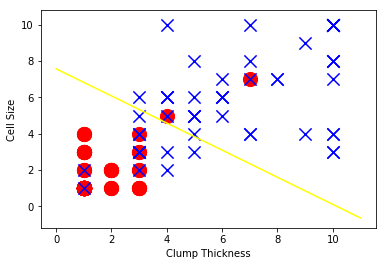

In [59]:
import matplotlib.pyplot as plt
plt.plot(x1,x2,c='yellow')
plt.scatter(test_negative['Clump Thickness'],test_negative['Cell Size'],marker='o',s=200,c='red')
plt.scatter(test_positive['Clump Thickness'],test_positive['Cell Size'],marker='x',s=150,c='blue')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.show()

### 使用skflow内置的LinearRegressor,DNN和sklearn中的集成回归对于boston房价进行回归

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from skflow import TensorFlowLinearRegressor
from skflow import TensorFlowDNNRegressor
from sklearn.datasets import load_boston

In [4]:
X=load_boston().data
y=load_boston().target

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2019)

In [8]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [9]:
tf_lr=TensorFlowLinearRegressor(steps=10000,learning_rate=0.01,batch_size=50)
tf_lr.fit(X_train,y_train)
tf_lr_predict=tf_lr.predict(X_test)
print(tf_lr.score(X_test,y_test))
print(mean_absolute_error(y_test,tf_lr_predict))
print(mean_squared_error(y_test,tf_lr_predict))

AttributeError: module 'tensorflow' has no attribute 'histogram_summary'

如果提示下面错误
```
C:\ProgramData\Anaconda3\lib\site-packages\skflow\estimators\base.py in _setup_training(self)  
    131             # Add histograms for X and y if they are floats.  
    132             if self._data_feeder.input_dtype in (np.float32, np.float64):  
--> 133                 tf.histogram_summary("X", self._inp)  
    134             if self._data_feeder.output_dtype in (np.float32, np.float64):  
    135                 tf.histogram_summary("y", self._out)  

AttributeError: module 'tensorflow' has no attribute 'histogram_summary'
```
tf.histogram_summary 改为：tf.summary.histogram

In [10]:
tf_dnn=TensorFlowDNNRegressor(hidden_units=[100,40],steps=10000,learning_rate=0.01,batch_size=50)
tf_dnn.fit(X_train,y_train)
tf_dnn_predict=tf_dnn.predict(X_test)
print(tf_dnn.score(X_test,y_test))
print(mean_absolute_error(y_test,tf_dnn_predict))
print(mean_squared_error(y_test,tf_dnn_predict))

AttributeError: module 'tensorflow' has no attribute 'histogram_summary'

In [11]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_predict=rfr.predict(X_test)
print(rfr.score(X_test,y_test))
print(mean_absolute_error(y_test,rfr_predict))
print(mean_squared_error(y_test,rfr_predict))

0.8226020876055657
2.3708661417322827
12.433462992125984


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
